1)Identifying Missing Values


       SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0         2030495      271877     Consumer loans     1730.430   
1         2802425      108129         Cash loans    25188.615   
2         2523466      122040         Cash loans    15060.735   
3         2819243      176158         Cash loans    47041.335   
4         1784265      202054         Cash loans    31924.395   
...           ...         ...                ...          ...   
49994     1171956      339569         Cash loans          NaN   
49995     1904808      363980         Cash loans          NaN   
49996     2331005      231295         Cash loans    22176.405   
49997     1960897      346691         Cash loans          NaN   
49998     1979352      363244         Cash loans    24909.390   

       AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0              17145.0     17145.0               0.0          17145.0   
1             607500.0    679671.0               NaN         607500.0   


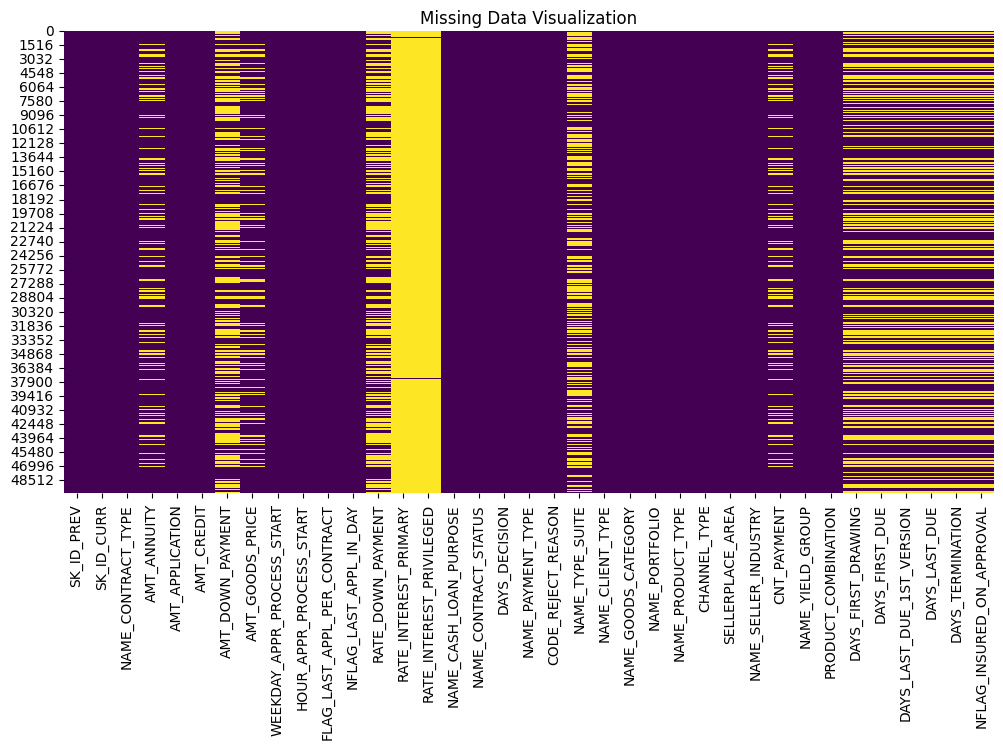

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#dataset
df = pd.read_csv('/content/sample_data/previous_application..csv')

#prints few rows of the datset
print(df)

#identifies the null cells
missing_data = df.isnull().sum()

# Visualizes missing data with horizontal bar plot
missing_data = df.isnull()

# Visualizes missing data with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()


2)Detecting Outliers

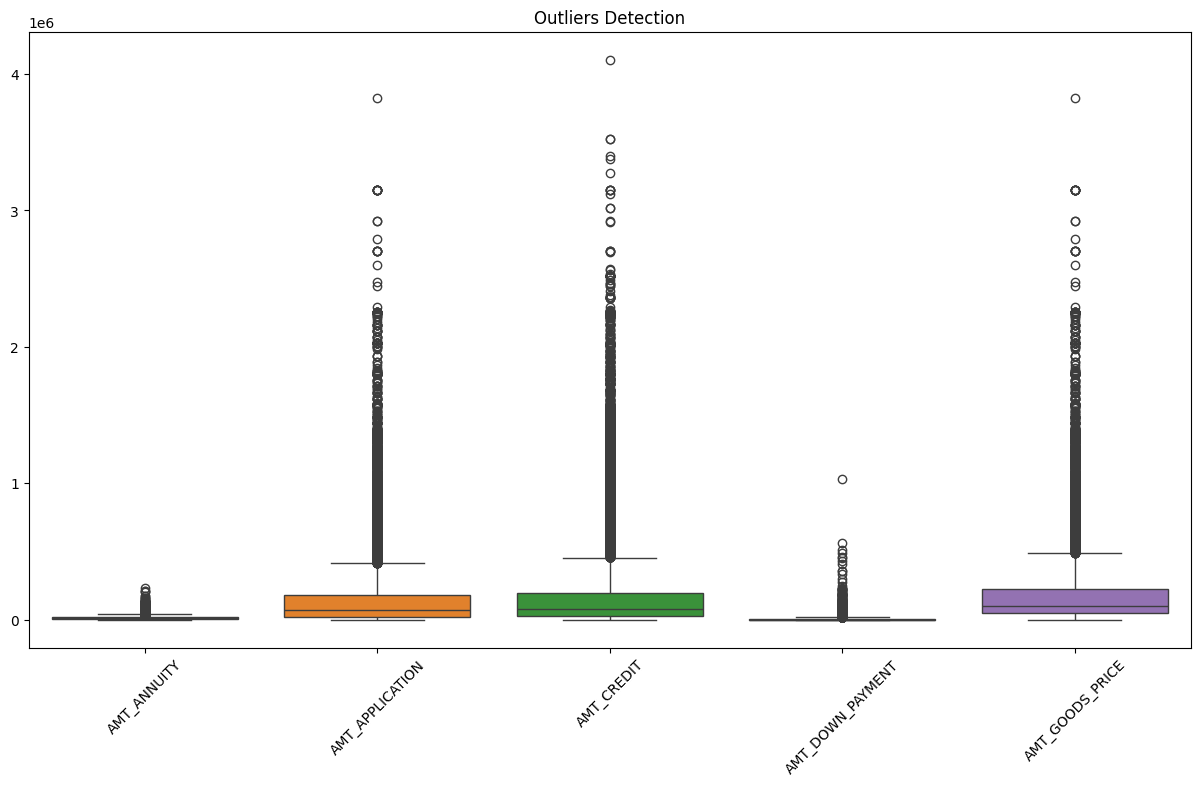

Number of outliers in each numerical column:
AMT_ANNUITY         2640
AMT_APPLICATION     5792
AMT_CREDIT          5648
AMT_DOWN_PAYMENT    2020
AMT_GOODS_PRICE     4189
dtype: int64
Total number of outliers in the entire dataset: 20289


<ipython-input-3-f555319d2c90>:31: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  all_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


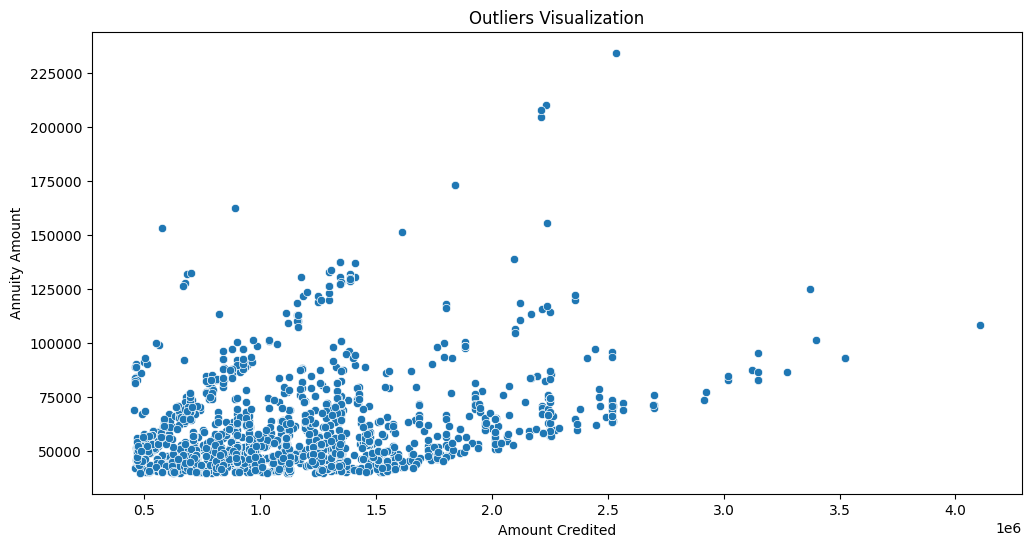

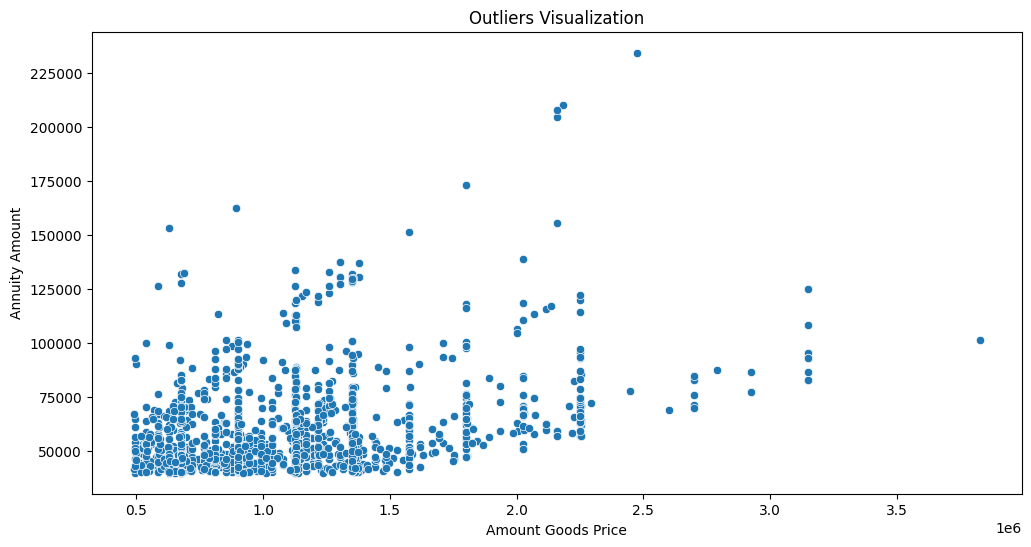

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# numerical columns with specific variables
numerical_columns = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']

# Using box plots to identify outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Outliers Detection')
plt.xticks(rotation=45)
plt.show()

# Identifying outliers using IQR method
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Count the number of outliers in each numerical column
outliers_count = outliers.sum()

print("Number of outliers in each numerical column:")
print(outliers_count)

all_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Counts the total number of outliers in the entire dataset
total_outliers_count = all_outliers.sum().sum()

print("Total number of outliers in the entire dataset:", total_outliers_count)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=df[outliers])
plt.title('Outliers Visualization')
plt.xlabel('Amount Credited')
plt.ylabel('Annuity Amount')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_ANNUITY', data=df[outliers])
plt.title('Outliers Visualization')
plt.xlabel('Amount Goods Price')
plt.ylabel('Annuity Amount')
plt.show()


3) Data Imbalance


<ipython-input-8-5423f7a451e7>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[target_variable] = pd.cut(df_filtered[target_variable], bins=2, labels=[0, 1])
<ipython-input-8-5423f7a451e7>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_variable, data=df_filtered, palette='Set2')
<ipython-input-8-5423f7a451e7>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

AMT_GOODS_PRICE - Class Counts: 0    23712
1        3
Name: AMT_GOODS_PRICE, dtype: int64
AMT_GOODS_PRICE - Imbalance Ratio: 0.00012651821862348178
AMT_CREDIT - Class Counts: 0    23712
1        3
Name: AMT_CREDIT, dtype: int64
AMT_CREDIT - Imbalance Ratio: 0.00012651821862348178


<ipython-input-8-5423f7a451e7>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[target_variable] = pd.cut(df_filtered[target_variable], bins=2, labels=[0, 1])
<ipython-input-8-5423f7a451e7>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_variable, data=df_filtered, palette='Set2')
<ipython-input-8-5423f7a451e7>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

AMT_ANNUITY - Class Counts: 0    23693
1       22
Name: AMT_ANNUITY, dtype: int64
AMT_ANNUITY - Imbalance Ratio: 0.0009285442957835647
AMT_DOWN_PAYMENT - Class Counts: 0    23713
1        2
Name: AMT_DOWN_PAYMENT, dtype: int64
AMT_DOWN_PAYMENT - Imbalance Ratio: 8.434192215240585e-05
AMT_APPLICATION - Class Counts: 0    23712
1        3
Name: AMT_APPLICATION, dtype: int64
AMT_APPLICATION - Imbalance Ratio: 0.00012651821862348178


<ipython-input-8-5423f7a451e7>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_variable, data=df_filtered, palette='Set2')


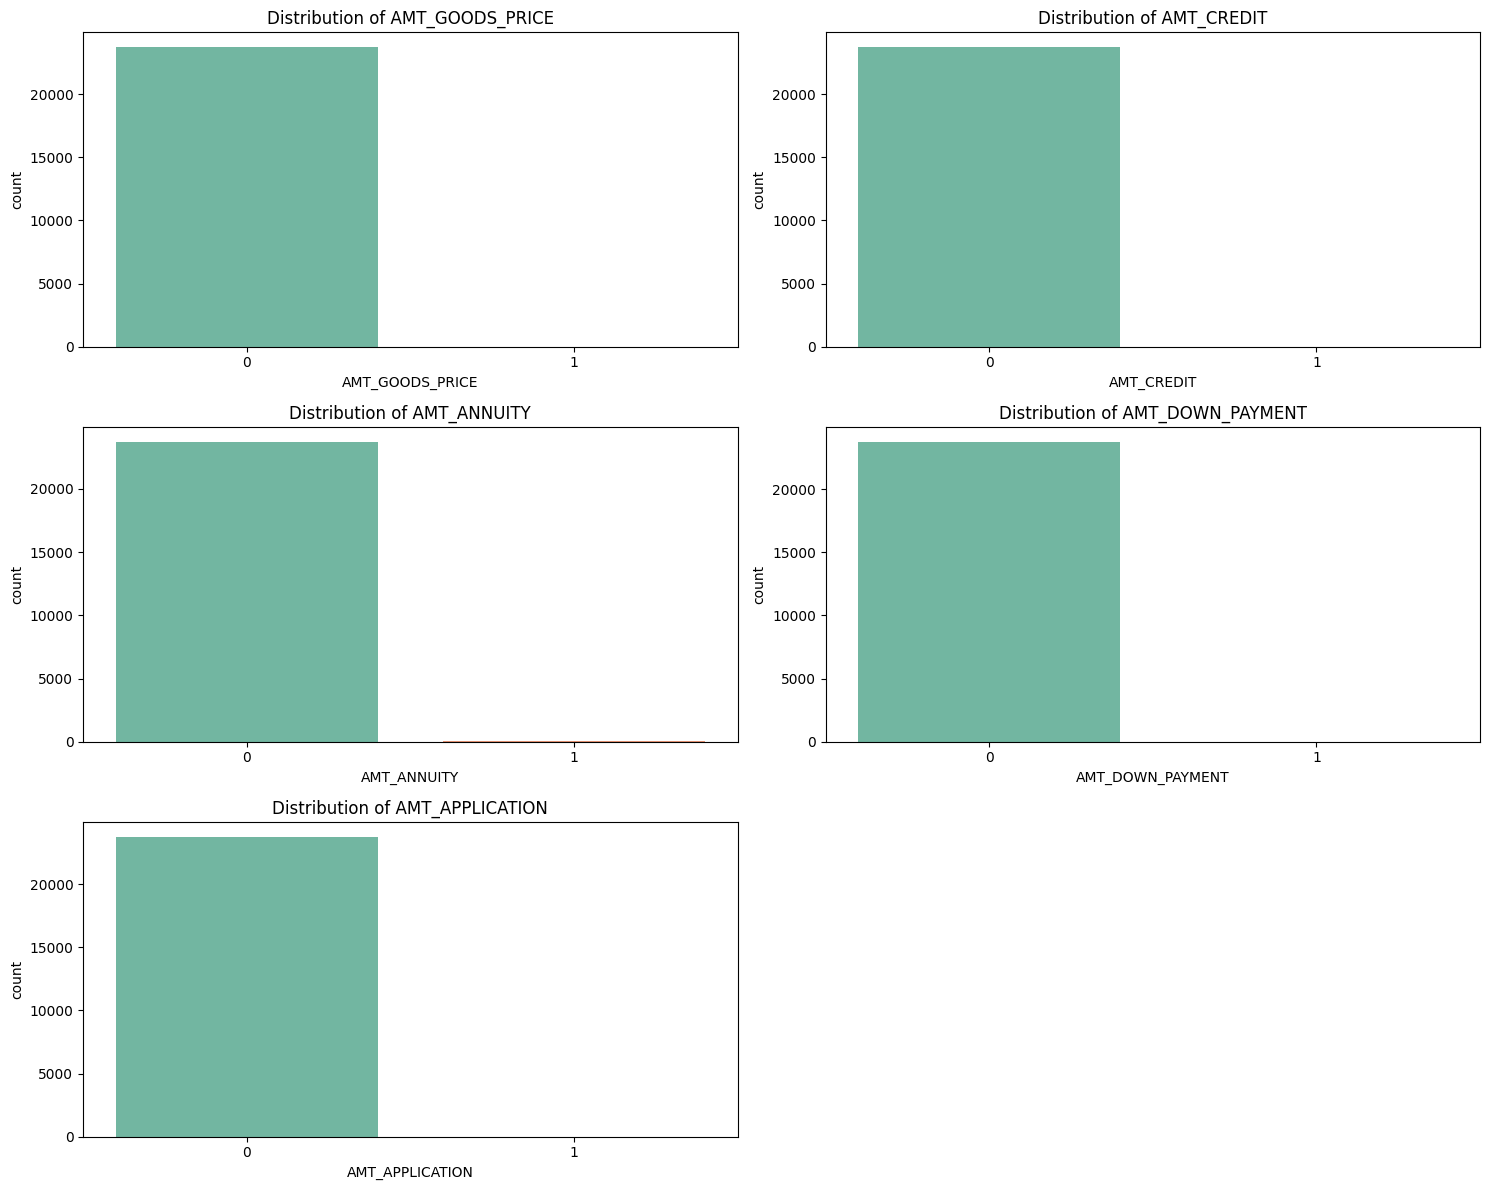

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/previous_application..csv')

numeric_variables = ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_DOWN_PAYMENT','AMT_APPLICATION']

# Handling missing values
df_filtered = df.dropna(subset=numeric_variables)

# Create subplots for each variable
plt.figure(figsize=(15, 12))

for i, target_variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 2, i)

    df_filtered[target_variable] = pd.cut(df_filtered[target_variable], bins=2, labels=[0, 1])

    # Calculate class counts
    class_counts = df_filtered[target_variable].value_counts()

    imbalance_ratio = class_counts[1] / class_counts[0] if 1 in class_counts.index else 0

    # Print class counts and imbalance ratio
    print(f"{target_variable} - Class Counts:", class_counts)
    print(f"{target_variable} - Imbalance Ratio:", imbalance_ratio)

    # Visualizing the distribution with a countplot
    sns.countplot(x=target_variable, data=df_filtered, palette='Set2')
    plt.title(f'Distribution of {target_variable}')

plt.tight_layout()
plt.show()


4)Univariate,Segmented Univariate Bi-Variate Analysis

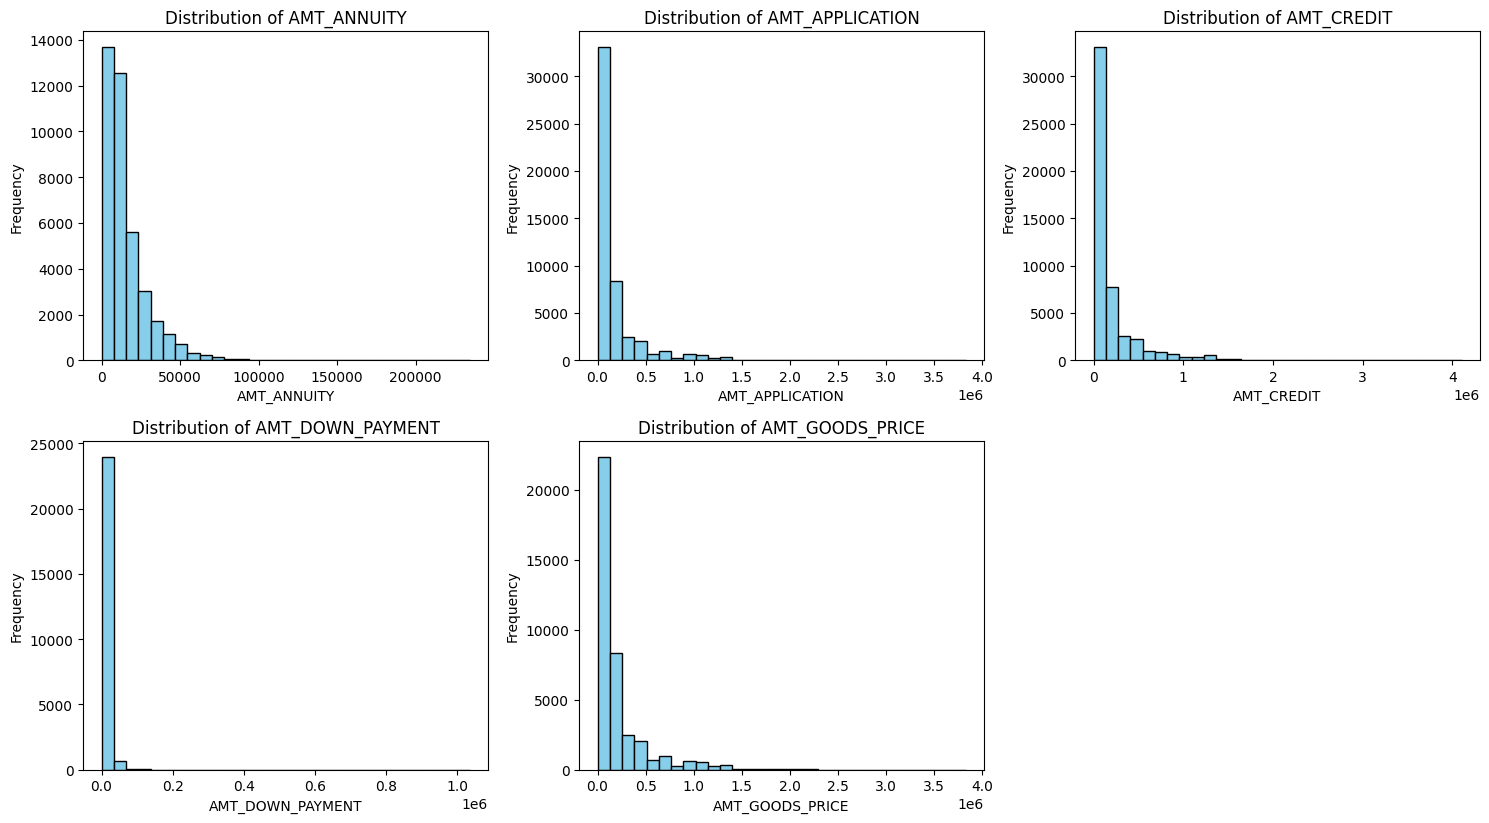

In [ ]:
#Univariate Analysis
variable_names = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']

plt.figure(figsize=(15, 12))

# Creating subplots for each variable
for i, variable in enumerate(variable_names, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot layout based on the number of variables
    plt.hist(df[variable], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
#filtered dataset
# Remove rows with 'XNA' values in 'NAME_YIELD_GROUP' and 'NAME_PAYMENT_TYPE'
df_filtered = df.query("NAME_YIELD_GROUP != 'XNA' and NAME_PAYMENT_TYPE != 'XNA'")

print(df_filtered)

       SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0         2030495      271877     Consumer loans     1730.430   
2         2523466      122040         Cash loans    15060.735   
3         2819243      176158         Cash loans    47041.335   
4         1784265      202054         Cash loans    31924.395   
5         1383531      199383         Cash loans    23703.930   
...           ...         ...                ...          ...   
49990     1300444      197725         Cash loans    32242.500   
49991     2768824      250283         Cash loans    36111.600   
49992     2595549      432416     Consumer loans     3951.225   
49996     2331005      231295         Cash loans    22176.405   
49998     1979352      363244         Cash loans    24909.390   

       AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0              17145.0     17145.0               0.0          17145.0   
2             112500.0    136444.5               NaN         112500.0   


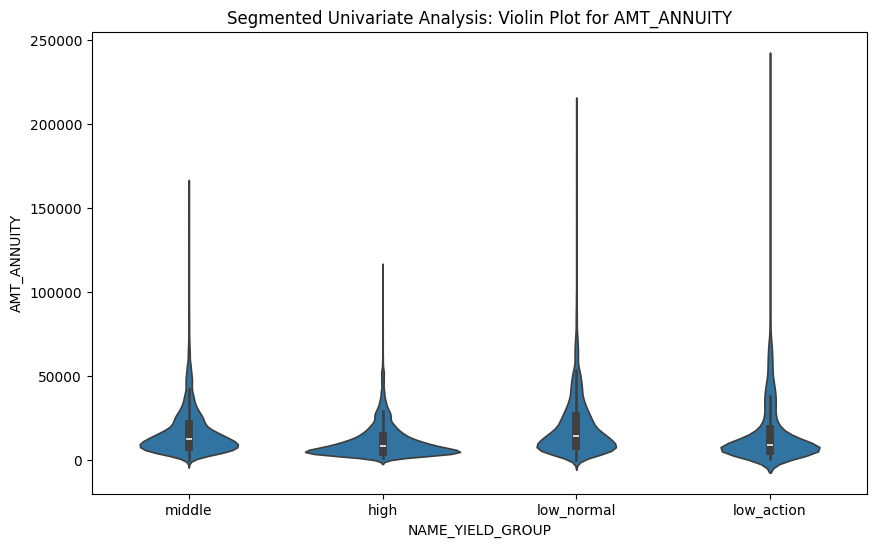

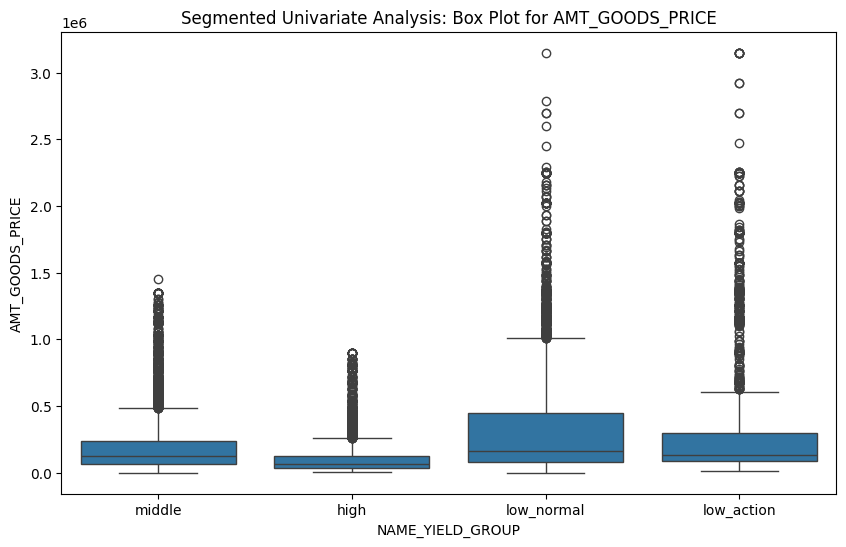

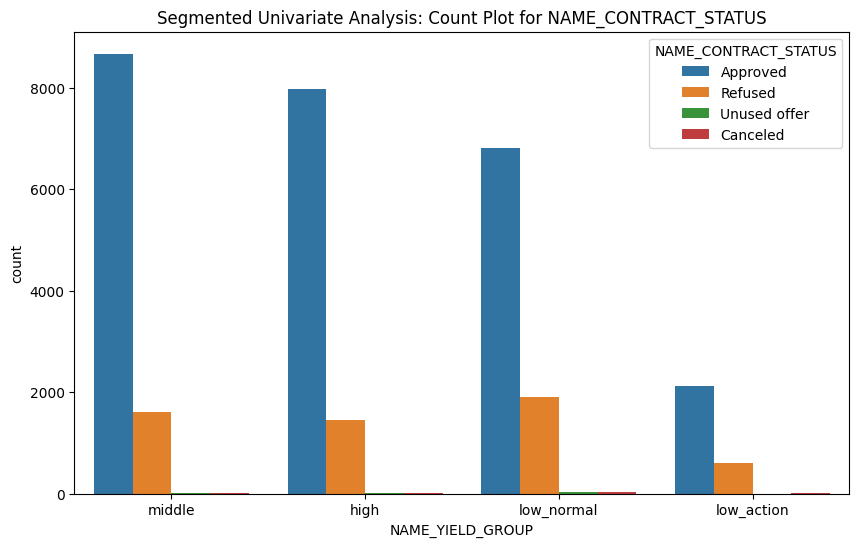

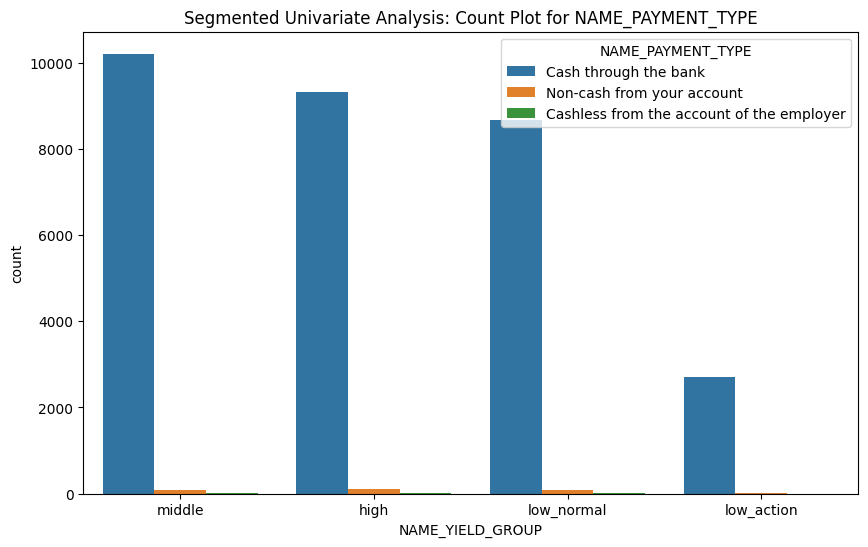

In [ ]:
# Segmented Univariate Analysis for NAME_YIELD_GROUP

# Violin Plot for AMT_ANNUITY
plt.figure(figsize=(10, 6))
sns.violinplot(x='NAME_YIELD_GROUP', y='AMT_ANNUITY', data=df_filtered)
plt.title('Segmented Univariate Analysis: Violin Plot for AMT_ANNUITY')
plt.xlabel('NAME_YIELD_GROUP')
plt.ylabel('AMT_ANNUITY')
plt.show()

# Box Plot for AMT_GOODS_PRICE
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_YIELD_GROUP', y='AMT_GOODS_PRICE', data=df_filtered)
plt.title('Segmented Univariate Analysis: Box Plot for AMT_GOODS_PRICE')
plt.xlabel('NAME_YIELD_GROUP')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

# Count Plot for NAME_CONTRACT_STATUS
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_YIELD_GROUP', hue='NAME_CONTRACT_STATUS', data=df_filtered)
plt.title('Segmented Univariate Analysis: Count Plot for NAME_CONTRACT_STATUS')
plt.xlabel('NAME_YIELD_GROUP')
plt.ylabel('Count')
plt.show()

# Count Plot for NAME_PAYMENT_TYPE
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_YIELD_GROUP', hue='NAME_PAYMENT_TYPE', data=df_filtered)
plt.title('Segmented Univariate Analysis: Count Plot for NAME_PAYMENT_TYPE')
plt.xlabel('NAME_YIELD_GROUP')
plt.ylabel('Count')
plt.show()


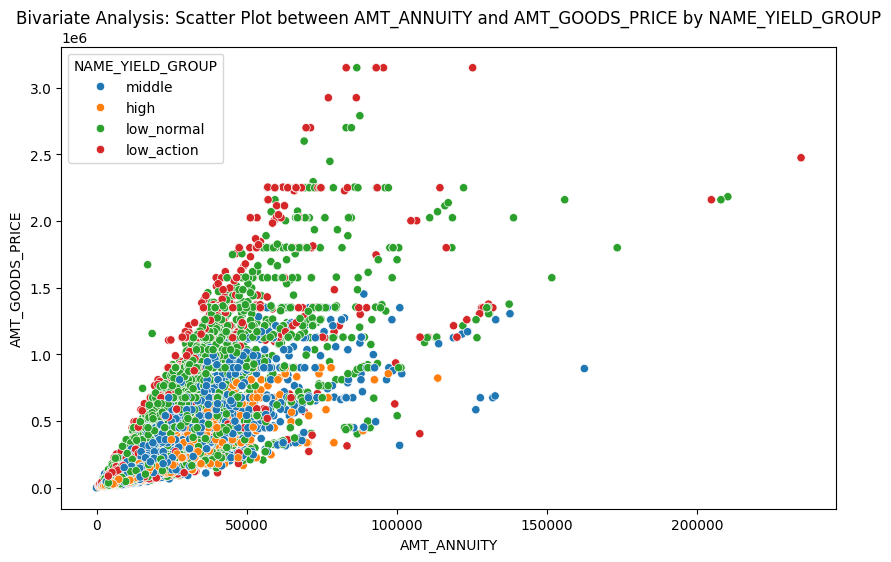

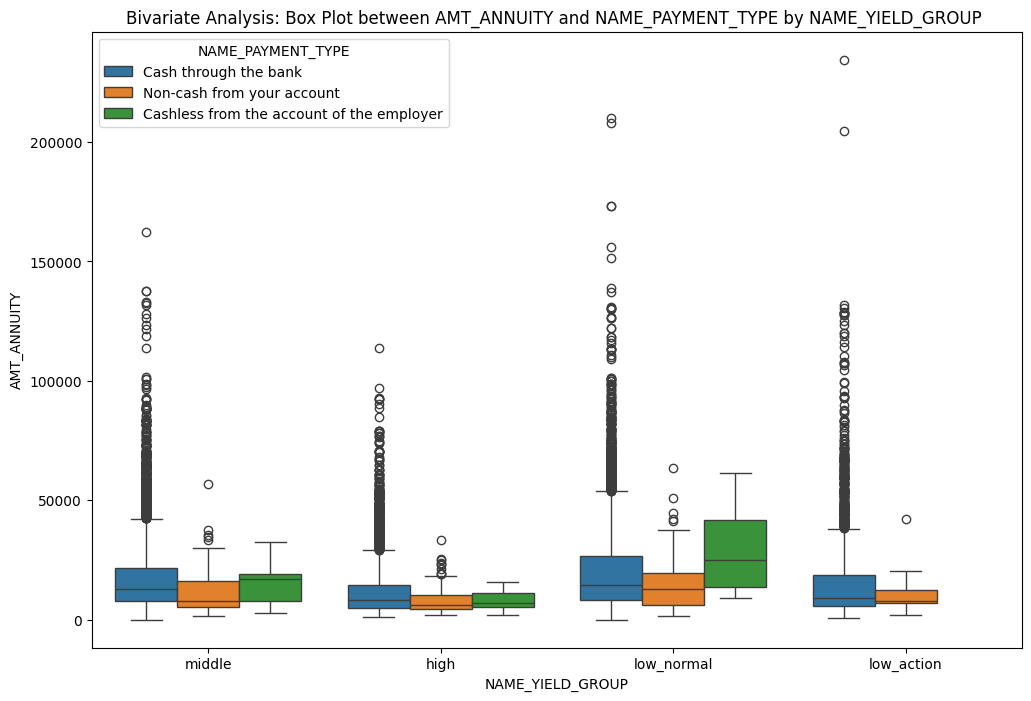

In [ ]:
# Bivariate analysis between AMT_ANNUITY and AMT_GOODS_PRICE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', hue='NAME_YIELD_GROUP', data=df_filtered)
plt.title('Bivariate Analysis: Scatter Plot between AMT_ANNUITY and AMT_GOODS_PRICE by NAME_YIELD_GROUP')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

# Bivariate analysis between AMT_ANNUITY and NAME_PAYMENT_TYPE
plt.figure(figsize=(12, 8))
sns.boxplot(x='NAME_YIELD_GROUP', y='AMT_ANNUITY', hue='NAME_PAYMENT_TYPE', data=df_filtered)
plt.title('Bivariate Analysis: Box Plot between AMT_ANNUITY and NAME_PAYMENT_TYPE by NAME_YIELD_GROUP ')
plt.show()


5)Identifying Top-Correlations

In [ ]:
import pandas as pd

unique_yield_groups = df_filtered['NAME_YIELD_GROUP'].unique()

for yield_group in unique_yield_groups:
    yield_group_df = df_filtered[df_filtered['NAME_YIELD_GROUP'] == yield_group]

    # Calculates correlations
    # took annual amount to know the financial status about different applicants - relates to estimate how difficult it is for them to repay the loan
    correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']

    # Prints correlation values
    print(f'Correlation Matrix - {yield_group} and AMT_ANNUITY:\n{correlation_yield_group}\n')


Correlation Matrix - middle and AMT_ANNUITY:
SK_ID_PREV                  -0.007841
SK_ID_CURR                  -0.006001
AMT_ANNUITY                  1.000000
AMT_APPLICATION              0.855755
AMT_CREDIT                   0.842825
AMT_DOWN_PAYMENT             0.285261
AMT_GOODS_PRICE              0.855755
HOUR_APPR_PROCESS_START     -0.050368
NFLAG_LAST_APPL_IN_DAY      -0.015645
RATE_DOWN_PAYMENT           -0.088573
RATE_INTEREST_PRIMARY        0.084877
RATE_INTEREST_PRIVILEGED    -0.229250
DAYS_DECISION                0.115881
SELLERPLACE_AREA            -0.113472
CNT_PAYMENT                  0.326376
DAYS_FIRST_DRAWING                NaN
DAYS_FIRST_DUE              -0.041402
DAYS_LAST_DUE_1ST_VERSION    0.024775
DAYS_LAST_DUE                0.043317
DAYS_TERMINATION             0.042315
NFLAG_INSURED_ON_APPROVAL    0.322049
Name: AMT_ANNUITY, dtype: float64

Correlation Matrix - high and AMT_ANNUITY:
SK_ID_PREV                  -0.002654
SK_ID_CURR                  -0.011800
AMT

<ipython-input-23-f999584fbd4e>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']


<ipython-input-22-94687db8ae0c>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']


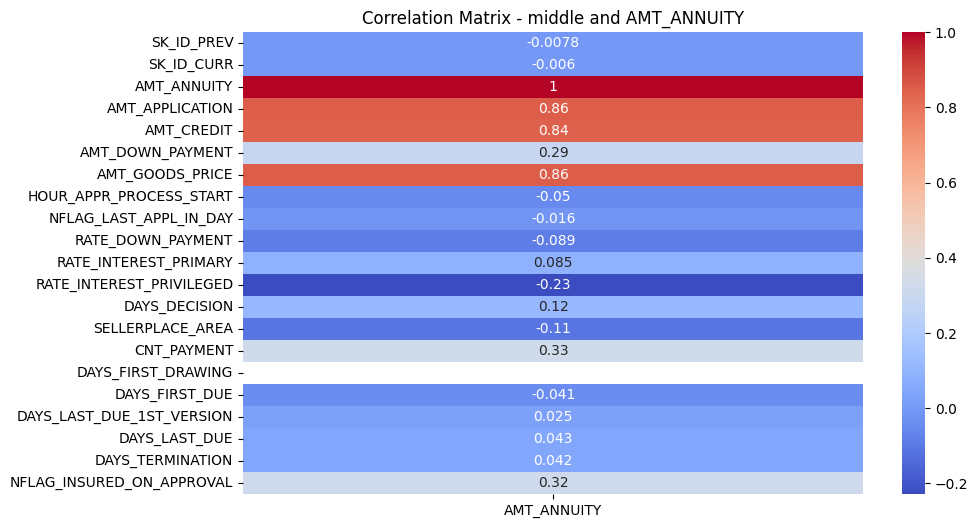

<ipython-input-22-94687db8ae0c>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']


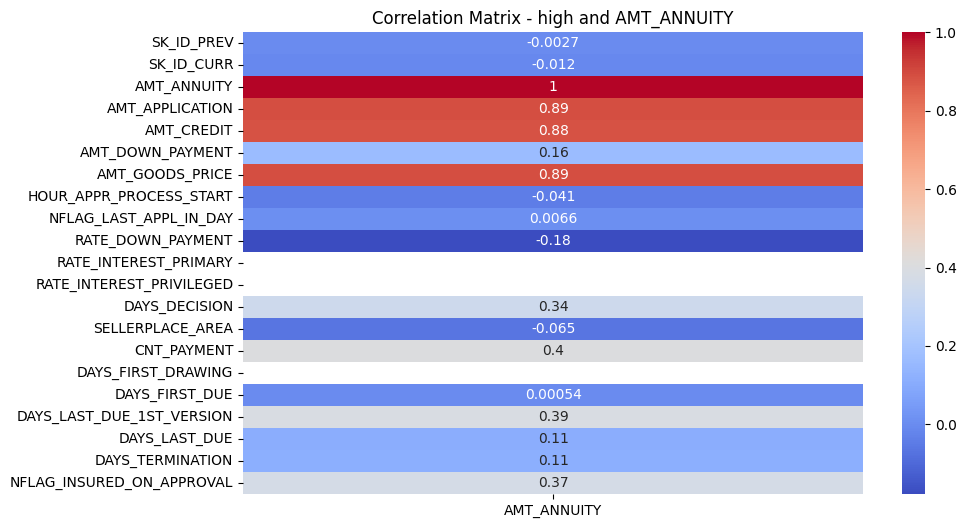

<ipython-input-22-94687db8ae0c>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']


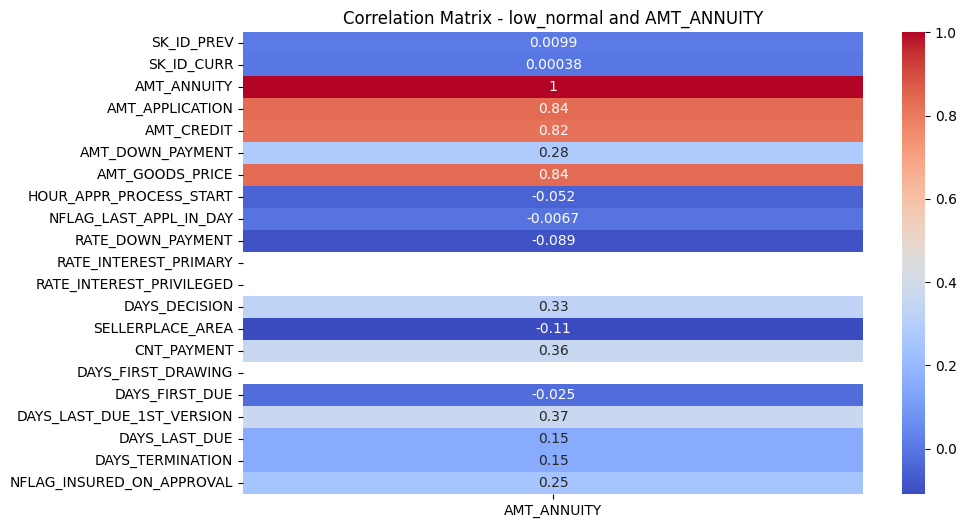

<ipython-input-22-94687db8ae0c>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']


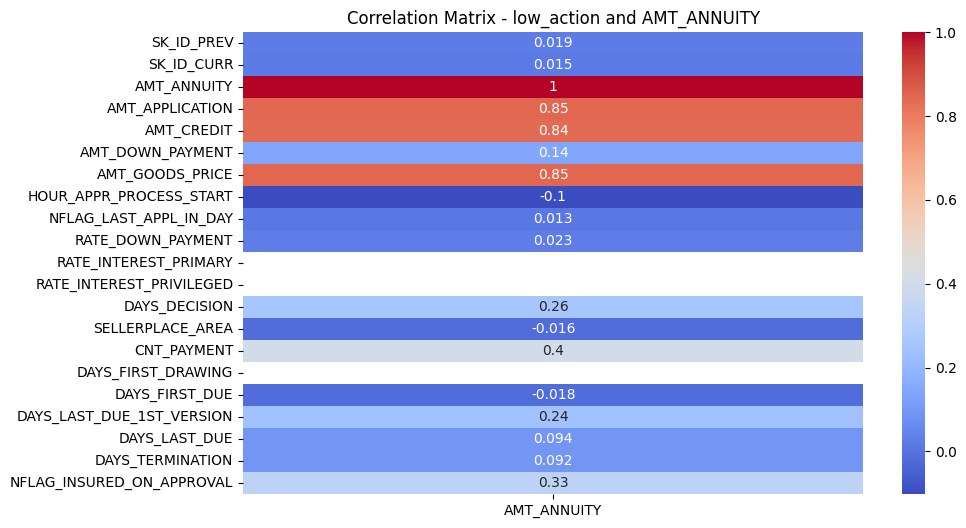

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


unique_yield_groups = df_filtered['NAME_YIELD_GROUP'].unique()

for yield_group in unique_yield_groups:
    yield_group_df = df_filtered[df_filtered['NAME_YIELD_GROUP'] == yield_group]

    # Calculates correlations
    correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']

    # Visualize correlations with a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_yield_group.to_frame(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix - {yield_group} and AMT_ANNUITY')
    plt.show()
